# Lesson 3: The Drinking Game <a class="tocSkip">
    
By the end of this lesson, you will know how to approach _any_ dynamic programming problem.
    
To demonstrate this method, we'll work on our first problem that really requires dynamic programming to solve which I have called 'The Drinking Game'.

Along the way you'll learn:
1. When to ignore, and what parts to ignore in the problem description
2. One common subproblem choosing strategy (we'll cover others later)
2. The 4 steps: Two steps to a correct solution, one more step to an efficient solution, and one further step for optional improvement.
    
    
The following video introduces the topic.  


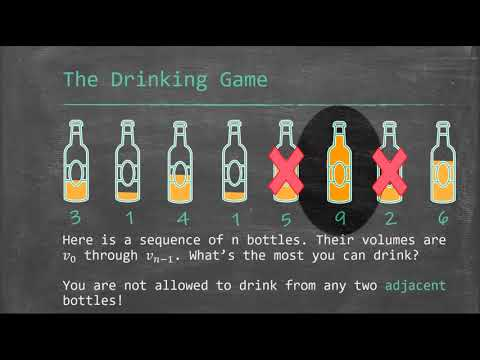

In [271]:
from IPython.display import YouTubeVideo
YouTubeVideo('B4201HEb3ro')

## The Drinking Game Problem

<figure>
    <img src="../images/drinking_game_bottles.png">
    <figcaption>Figure 1: You’re given a sequence of n bottles, the volumes of some (unidentified) liquid are $𝑣_0$ through $𝑣_{(𝑛−1)}$ . Drink as much as you can, given that you cannot drink from any two adjacent bottles.
    </figcaption>
</figure>
<p>

The drinking game is an easy to understand version of 'find the maximum weighted [independent set](https://en.wikipedia.org/wiki/Independent_set_(graph_theory)) on a line'. The bottles can be thought of as vertices in a graph as shown below. We want to find the heaviest set of vertices that are __not connected__ by an edge.

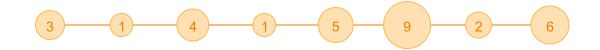

In [272]:
# Import package
from igraph import *

# a line tree with 8 nodes
g = Graph.Tree(8, 1)
g.vs["weight"] = [3, 1, 4, 1, 5, 9, 2, 6]


# draw the graph
#layout = g.layout("kk", )
layout = g.layout_grid(100, 0, 2)
#print(layout[0])

visual_style = {}
visual_style["vertex_size"] = [20 + 3*w for w in g.vs["weight"]]
visual_style["vertex_color"] = ["#FFE0B2"]
visual_style["vertex_frame_color"] = ["#FFB74D"]
visual_style["edge_color"] = ["#F57C00"]
visual_style["vertex_label"] = [str(w) for w in g.vs["weight"]]
visual_style["vertex_label_color"] = ["#F57C00"]
visual_style["vertex_label_dist"] = 0
visual_style["edge_width"] = [1]
visual_style["edge_length"] = [1]
visual_style["layout"] = layout
visual_style["bbox"] = (600, 50)
visual_style["margin"] = [50, 0, 50, 0]

plot(g, **visual_style)

### How to start
Read the problem statement and identify the optimization part. Look for key words such as 'most', 'least', 'longest', 'shortest', 'heaviest' etc. Just to get a start on the problem __IGNORE__ the optimization part (this is temporary - don't worry - we'll come back to the original problem very soon) and rephrase the question as one of finding all the valid possibilities. So for example, if you are asked to find 'the shortest path' - rephrase the question temporarily to 'find all the paths'.

In [273]:
%run quizzes/quiz.py quizzes/03/first_step.json

AppLayout(box_style='info', children=(HBox(children=(Label(value='As a first step, how would you rephrase the …

### Choosing the Subproblems
You are still ignoring the optimization requirement of the problem and trying to find all combinations that satisfy some constraint (in our case, that the bottles may not be adjacent). In this stage, you need to break up finding the combinations from _all_ the elements of the series, to finding those combinations of bottles in some finite number of subgroups.

The question is how to choose those subsets? One pattern is to choose the __first $i$ elements__. 

#### Choose the Pattern
If your input is: $x_1$, $x_2$, $x_3$, ... ,$x_n$, your subproblems will be of the form: $x_1$, $x_2$, $x_3$, ..., $x_i$

    +----------------------------+
    | x1   x2   x3  x4   x5   x6 |  x7   x8   x9   x10
    +----------------------------+

For the drinking game problem, we'll use this __prefix pattern__. Instead of looking for all the combinations of bottles in the set of all bottles, we'll form one or more subsets starting from the beginning of the series.

Now it remains to define the pattern of the subsets themselves. This is linked to the recurrence relation that we'll build.

#### Choose the Cases
In order to solve the problem by recursion, we need to define a recurrence relation. How do we discover this relation? One way to think about it, is that the subproblems of any given problem can be divided into a few types, or cases. 

In this problem, 

Will we take the last (the 8th) bottle? If yes, then the rest of the solution must come from the first 6 bottles so as not to break the adjacency rule
If not, then the rest of the solution must come from the first 7 bottles.

<div class="exercise exercise-info">
Implement the recursive, non-memoized algorithm to solve the drinking game problem. Starter code provided below.
</div>

In [274]:
def solve(n):
    ### YOUR CODE ###
    return 0

#unit tests (hint: there are 3 base cases!)
## YOUR CASES HERE ###

#assert(solve([3, 1, 4, 1, 5, 9, 2, 6]) == 22)

<div class="exercise exercise-info">
Implement the recursive, <b>memoized</b> algorithm to solve the drinking game problem. Starter code provided below.
</div>

In [275]:
def memoize(f):
    ## YOUR CODE ##
    return 0

@memoize
def solve(v):
    ### YOUR CODE ###
    return 0

#unit tests (hint: there are 3 base cases!)
## YOUR CASES HERE ###

#assert(solve([3, 1, 4, 1, 5, 9, 2, 6]) == 22)

## More Practice Problems

### A Stingy Drinking Game

<div class="exercise exercise-info">
This problem is very, very similar to the original one. Solve it to cement the ideas you have just learned.
<br><br>
You’re given a sequence of n bottles, the volumes of some (unidentified) liquid are $𝑣_0$ through $𝑣_{(𝑛−1)}$ . Drink as much as you can - the rule is that the bottles you choose must be __two__ bottles apart. So if your volumes are [3, 1, 4, 1, 5, 9, 2, 6] and you choose bottle weighted 9, the only bottles you can now choose from would be the first three: [3, 1, 4] and from those you would only be able to choose one ...
<br><br>Your solution should run in linear time!
</div>


In [276]:
def solve_stingy(f):
    ### YOUR CODE ###
    def helper(v):
        return helper

#unit tests - base cases (hint: there are 4 base cases!)
## YOUR CASES HERE ###

#assert(solve_stingy([3, 1, 4, 1, 5, 9, 2, 6]) == 14)

## Solutions

<div class="exercise exercise-warning"><details><summary>Drinking game - non-memoized</summary>    
```python 
    
    # %load solutions/03/dg_max_value.py
    def solve(v):

        n = len(v)
        if n == 2:
            return max(v[0], v[1])
        elif n == 1:
            return v[0]
        elif n == 0:
            return 0

        return max(v[n-1] + solve(v[0: n - 2]), solve(v[0: n - 1]))

    # unit tests
    assert(solve([]) == 0)
    assert(solve([5]) == 5)
    assert(solve([5, 6]) == 6)
    assert(solve([5, 5, 5, 5, 5]) == 15)
    assert(solve([3, 1, 4, 1, 5, 9, 2, 6]) == 22)

```
</details>

<div class="exercise exercise-warning"><details><summary>Stingy drinking game - memoized</summary>    
```python 
    
    # %load solutions/03/stingy_memoized.py
    def memoize(f):
    memo = {}

    def helper(v):
        n = len(v)
        if n not in memo:
            memo[n] = f(v)
        return memo[n]

    return helper

    @memoize
    def solve_stingy(v):

        n = len(v)
        if n == 3:
            return max(v[0], v[1], v[2]) 
        elif n == 2:
            return max(v[0], v[1])
        elif n == 1:
            return v[0]
        elif n == 0:
            return 0

        return max(v[n-1] + solve_stingy(v[0: n - 3]), solve_stingy(v[0: n - 2]), solve_stingy(v[0: n - 1]))

#unit tests
assert(solve_stingy([]) == 0)
assert(solve_stingy([3]) == 3)
assert(solve_stingy([3, 1]) == 3)
assert(solve_stingy([3, 1, 4]) == 4)
assert(solve_stingy([3, 1, 4, 1, 5, 9, 2, 6]) == 14)

```
</details>

## References

1. Forišek, M. (2015). Towards a better way to teach dynamic programming. Olympiads in Informatics, 9, 45–55.

2. The igraph core team. (2003, 2020). Getting started with python-igraph. https://igraph.org/python/

In [277]:
# workaround for known ipywidget issue not rendering alert style colours on Jupyter lab
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())

In [278]:
# workaround for known ipywidget issue not rendering alert style colours on Jupyter lab
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())

In [279]:
# workaround for known ipywidget issue not rendering alert style colours on Jupyter lab
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())

In [280]:
# workaround for known ipywidget issue not rendering alert style colours on Jupyter lab
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())